# Analysis of sales in 2012-2014
# Author: Adrian Żelazek

## Table of contents
Introduction<br>
1. Libraries<br>
2. Dataset<br>
3. Analysis of number of transactions in countries<br>
4. Analysis of number of order method types per country<br>
5. Analysis of popularity of order method types in specified countries<br>
6. Profitability and fequency of order method types<br>
7. Profit assesment<br>
8. Analysis of profitability of selected years (2012-2014)<br>
9. Analysis of profitability of products including units sold and unit price<br>
10. Conclusions

## Introduction
<b>Dataset description:</b><br>
Dataset contains data on sales of some company in 2012-2014.<br>

<b>Problem description:</b><br>
Analysis of sales in 2012-2014. Grouping, visualization and inference from data sales.<br>

<b>Programming language:</b><br>
Python<br>

<b>Libraries:</b><br>
Pandas, NumPy, Matplotlib, Seaborn<br>

# 1. Librarires

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
%matplotlib inline
%matplotlib widget

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Version of Python and libraries used 
from platform import python_version
import matplotlib
print("Python version is {}".format(python_version()))
print("Pandas version is {}".format(pd.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))

Python version is 3.7.4
Pandas version is 0.25.1
Numpy version is 1.16.5
Matplotlib version is 3.1.2
Seaborn version is 0.9.0


In [3]:
#Choose of chars style
plt.style.use("ggplot")

# 2. Dataset

In [4]:
#Read of the dataset
data=pd.read_csv("Sales products 2012-14.csv")

In [5]:
#Start of the dataset
data.head(3)

,Country,Order method type,Retailer type,Product line,Item Type,Product,Year,Quarter,Total Revenue,Units Sold,Unit Cost,Gross margin,Total Profit
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,121.94,0.347548,-18233.434500
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,142.66,0.474274,-516.520007
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,611.84,0.352772,-187.714056


In [6]:
#End of the dataset
data.tail(3)

,Country,Order method type,Retailer type,Product line,Item Type,Product,Year,Quarter,Total Revenue,Units Sold,Unit Cost,Gross margin,Total Profit
88472,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Climbing Accessories,Firefly Charger,2014,Q3 2014,12255.48,236,51.93,0.569420,1416310.771
88473,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Tools,Granite Axe,2014,Q3 2014,56448.00,1470,38.40,0.491667,1487497.656
88474,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Tools,Granite Extreme,2014,Q3 2014,89376.00,1176,76.00,0.387895,1636376.446


In [7]:
#Dataset description 
print("Dataset contains {} records as well as {} columns.""\n" 
      "\n"
      "The are the following list of columns in the dataset: {}""\n"
      "\n"
      "List of countries: {}""\n"
      "\n"
      "List of order method type: {}""\n"
      "\n"
      "List of retailer type: {}""\n"
      "\n"
      "List of product line: {}""\n"
      "\n"
      "List of item type: {}""\n"
      "\n"
      "List of products: {}""\n"
      .format(data.shape[0], data.shape[1], list(data.columns),
              data["Country"].unique(), data["Order method type"].unique(), data["Retailer type"].unique(),
              data["Product line"].unique(), data["Item Type"].unique(), data["Product"].unique()))

Dataset contains 88475 records as well as 13 columns.

The are the following list of columns in the dataset: ['Country', 'Order method type', 'Retailer type', 'Product line', 'Item Type', 'Product', 'Year', 'Quarter', 'Total Revenue', 'Units Sold', 'Unit Cost', 'Gross margin', 'Total Profit']

List of countries: ['United States' 'Canada' 'Mexico' 'Brazil' 'Japan' 'Singapore' 'Korea'
 'China' 'Australia' 'Netherlands' 'Sweden' 'Denmark' 'Finland' 'France'
 'Germany' 'Switzerland' 'United Kingdom' 'Belgium' 'Austria' 'Italy'
 'Spain']

List of order method type: ['Fax' 'Telephone' 'Mail' 'Web' 'Sales visit' 'Special' 'E-mail']

List of retailer type: ['Outdoors Shop' 'Golf Shop' 'Department Store' 'Warehouse Store'
 'Eyewear Store' 'Sports Store' 'Direct Marketing'
 'Equipment Rental Store']

List of product line: ['Camping Equipment' 'Mountaineering Equipment' 'Personal Accessories'
 'Outdoor Protection' 'Golf Equipment']

List of item type: ['Cooking Gear' 'Tents' 'Sleeping Bags' 'Lant

In [8]:
#Dataset description in a nutshell
print("There are:" "\n"
     " - {} countries," "\n"
     " - {} order method types," "\n"
     " - {} retailer types," "\n"
     " - {} product lines," "\n"
     " - {} item types," "\n"
     " - {} different products" "\n"
      .format(data["Country"].value_counts().count(),
              data["Order method type"].value_counts().count(),
              data["Retailer type"].value_counts().count(),
              data["Product line"].value_counts().count(),
              data["Item Type"].value_counts().count(),
              data["Product"].value_counts().count()))

There are:
 - 21 countries,
 - 7 order method types,
 - 8 retailer types,
 - 5 product lines,
 - 21 item types,
 - 144 different products



In [9]:
#Unification of column names
columns_names = {"Order method type" : "Order Method Type",
                 "Retailer type"     : "Retailer Type",
                 "Product line"      : "Product Line",
                 "Unit Cost"         : "Unit Price", 
                 "Gross margin"      : "Gross Margin"}

data.rename(columns=columns_names, inplace=True)

In [10]:
#Sample of data frame after columns name modification
data.sample()

,Country,Order Method Type,Retailer Type,Product Line,Item Type,Product,Year,Quarter,Total Revenue,Units Sold,Unit Price,Gross Margin,Total Profit
30780,Finland,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q4 2012,52190.32,428,121.94,0.347548,12448.84839


In [11]:
#Survey of the overall data structure
datasetSummary = pd.DataFrame(data.dtypes, columns=["Data_type"])
datasetSummary["NAN"] = pd.DataFrame(data.isna().any())
datasetSummary["Sum_of_NAN"] = pd.DataFrame(data.isna().sum())
datasetSummary["Percent_of_NAN"] = round((data.apply(pd.isna).mean()*100),2)
datasetSummary.Data_type = datasetSummary.Data_type.astype(str)
datasetSummary

,Data_type,NAN,Sum_of_NAN,Percent_of_NAN
Country,object,False,0,0.00
Order Method Type,object,False,0,0.00
Retailer Type,object,False,0,0.00
Product Line,object,False,0,0.00
Item Type,object,False,0,0.00
Product,object,False,0,0.00
Year,int64,False,0,0.00
Quarter,object,False,0,0.00
Total Revenue,float64,False,0,0.00
Units Sold,int64,False,0,0.00


In [12]:
#Replace of NaN to "0" in Gross Margin columns
repace_definition = {"Gross Margin" : 0}
data = data.fillna(value=repace_definition)

In [13]:
#Searching of NaN values in the dataset
data.isna().any().any()

False

# 3. Analysis of number of transactions in countries

<font size="4">By far the most transactions took place in the USA and then in Canada France and Germany. The least transactions took place in Denmark, Sweden and Brazil.

In [14]:
#Data frame of number of transactions per country
number_of_transactions_per_country = pd.DataFrame({"Number of transactions" : data["Country"].value_counts()})

#Sort of data frame based on number of transactions
number_of_transactions_per_country= number_of_transactions_per_country.sort_values(by="Number of transactions", ascending=False)

#Transposition of data frame
number_of_transactions_per_country= number_of_transactions_per_country.T

#Save of data frame to Excel
number_of_transactions_per_country.to_excel("Number of transactions per country 2012-2014.xlsx")

number_of_transactions_per_country

,United States,Canada,France,Germany,Japan,United Kingdom,Netherlands,Switzerland,Italy,Austria,...,Belgium,Australia,China,Spain,Singapore,Finland,Korea,Brazil,Sweden,Denmark
Number of transactions,7482,5923,5779,5397,5359,5102,4199,4103,4018,3862,...,3710,3665,3652,3557,3443,3409,3399,3288,2925,2358


In [15]:
#Number of transactions per country
country_groups = data.groupby("Country")
for country, country_data in country_groups:
    print(country,
         country_data["Order Method Type"].count())

Australia 3665
Austria 3862
Belgium 3710
Brazil 3288
Canada 5923
China 3652
Denmark 2358
Finland 3409
France 5779
Germany 5397
Italy 4018
Japan 5359
Korea 3399
Mexico 3845
Netherlands 4199
Singapore 3443
Spain 3557
Sweden 2925
Switzerland 4103
United Kingdom 5102
United States 7482


In [16]:
#The dataset only with a Series of country data from base dataset
data_countries = data[["Country"]]

#Dictionary of abbreviations of some country names to make the plot more readable
data_countries["Country"]=data_countries['Country'].replace({"United States" : "USA",
                                                             "Canada"        : "CAN",
                                                             "Mexico"        : "MEX",
                                                             "Brazil"        : "BRA",
                                                             "Japan"         : "JPN",
                                                             "Singapore"     : "SGP",
                                                             "Korea"         : "KOR",
                                                             "China"         : "CHN",
                                                             "Australia"     : "AUS",
                                                             "Netherlands"   : "NDL",
                                                             "Sweden"        : "SWE",
                                                             "Denmark"       : "DNK",
                                                             "Finland"       : "FIN",
                                                             "France"        : "FRA",
                                                             "Germany"       : "DEU",
                                                             "Switzerland"   : "CHE",
                                                             "United Kingdom": "UK",
                                                             "Belgium"       : "BEL",
                                                             "Austria"       : "AUT",
                                                             "Italy"         : "ITA",
                                                             "Spain"         : "ESP" })

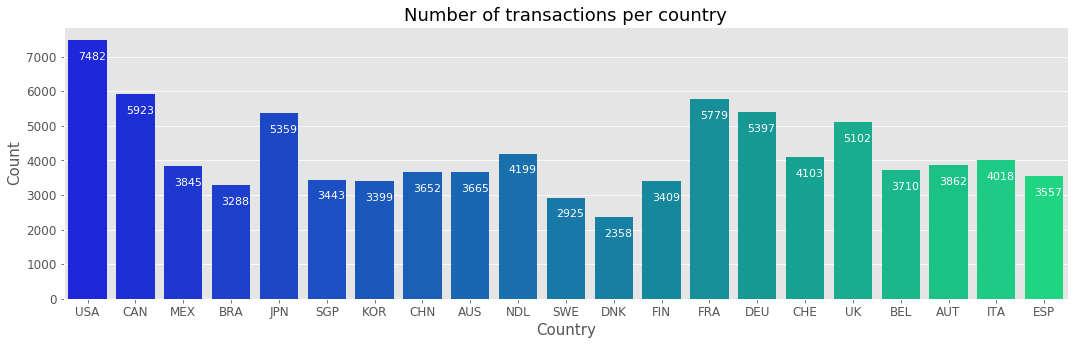

In [17]:
#Countplot of number of transactions per country
plt.figure(figsize=(18, 5))

ax=sns.countplot(x = "Country",
                 data = data_countries,
                 palette="winter")
ax.set_title("Number of transactions per country", fontsize = 18)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                va='top',
                color='white',
                size=11)
    
plt.show()

# 4. Analysis of number of order method types per country

<font size="4">In the USA, Japan and UK, there are the most number of available methods of order products (7) and the least in Brazil and Finland (2).

In [18]:
#Grouped countries and number of unique order method types
order_method_type_per_country = data.groupby("Country")["Order Method Type"].nunique().sort_values(ascending=False)

#Converting of grouped countries and number of unique order method types to data frame
order_method_type_per_country = order_method_type_per_country.to_frame()

#Light palette of grouped countries and number of unique order method types
cm = sns.light_palette("green", as_cmap=True)
order_method_type_per_country = order_method_type_per_country.style.background_gradient(cmap = cm)
order_method_type_per_country

,Order Method Type
Country,
United States,7
Japan,7
United Kingdom,7
Canada,6
Germany,6
Italy,6
Singapore,6
Switzerland,6
Australia,6


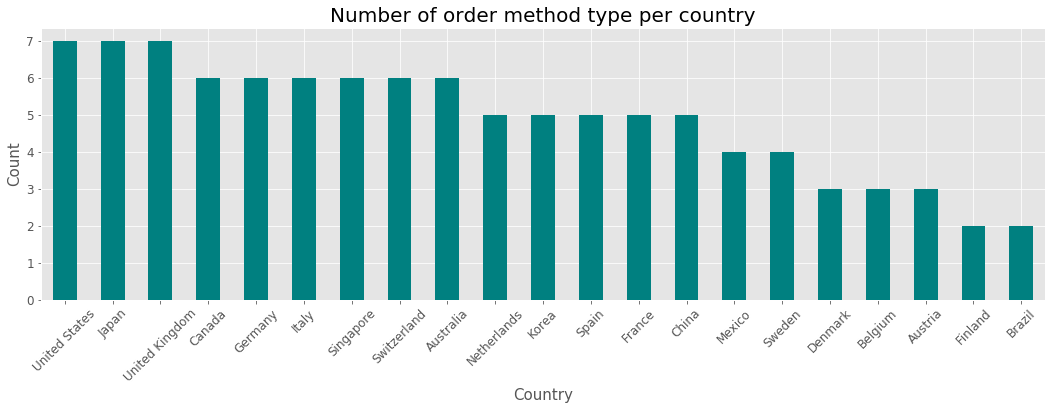

In [19]:
#Grouping by country with number of unique order method type
order_method_type_per_country_toplot = data.groupby("Country")["Order Method Type"].nunique().sort_values(ascending=False)

#Bar plot of unique oder method types per country
order_method_type_per_country_toplot.plot(kind="bar",
                                          rot=45,
                                          figsize=(18,5),
                                          color="teal")
plt.title("Number of order method type per country", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# 5. Analysis of popularity of order method types in specified countries

<font size="4">In each country, the website is the most popular method of placing an order. Sales visit and telephone are also popular methods of ordering. <br>

Interestingly, in Brazil, orders are placed only via web and e-mail. In Finland only by visit sales as well as web.

* **Email** is really popular in: Canada, Germany, Italy, Japan and Swede
* **Fax** is really popular in Belgium, France, Singapore, Spain, Switzerlands and USA
* **Mail** is really popular in Canada, Germany, Japan, Netherlands and USA
* **Sales visit** is really popular in each country except Brazil, Singapore and Spain 
* **Special** orders are popular mainly in Singapore and Switzerland
* **Telephon** is really popular in each country except Belgium, Brazil Denmark, Finland, Mexico and Switzerland
* **Web** is the most popular ordering method in each country

In [20]:
#Light palette of cross table concerning number of specified order method types per country
cm = sns.light_palette("yellow", as_cmap=True)
popularity_OMT_per_country = pd.crosstab(data["Country"], data["Order Method Type"]).style.background_gradient(cmap = cm)

#Save of data frame to Excel
popularity_OMT_per_country.to_excel("Order method type popularity per country 1.xlsx")

popularity_OMT_per_country

Order Method Type,E-mail,Fax,Mail,Sales visit,Special,Telephone,Web
Country,,,,,,,
Australia,18,0,12,575,25,640,2395
Austria,0,0,0,524,0,432,2906
Belgium,0,119,0,346,0,0,3245
Brazil,16,0,0,0,0,0,3272
Canada,1130,15,150,289,0,356,3983
China,0,55,15,165,0,168,3249
Denmark,0,11,0,195,0,0,2152
Finland,0,0,0,107,0,0,3302
France,10,236,0,697,0,919,3917


In [22]:
#Popularity of order method types in countries including methods not found in countries
country_OMT_popularity = (data.groupby(["Country","Order Method Type"])
                          .size()
                          .unstack(fill_value=0)
                          .stack()
                          .reset_index(name="Count"))
country_OMT_popularity["Country"] = country_OMT_popularity["Country"].mask(country_OMT_popularity["Country"].duplicated(), "")
country_OMT_popularity = country_OMT_popularity.set_index("Country")

#Save of data frame to Excel
country_OMT_popularity.to_excel("Order method type popularity per country 2.xlsx")

country_OMT_popularity.head(15)

,Order Method Type,Count
Country,,
Australia,E-mail,18
,Fax,0
,Mail,12
,Sales visit,575
,Special,25
,Telephone,640
,Web,2395
Austria,E-mail,0
,Fax,0


# 6. Profitability and fequency of order method types

In [23]:
#Use of pandas.set_option so as to change format of float 
#pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = "{:.2f}".format

<font size="4">By far the most products were sold through the website. The website also generates the biggest profit, the biggest profit per order. However, the website does not generate the greatest profit per unit sold. It means that the most expensive products are not sold with this method of making an order. <br>

The most significant prodit per order generate orders made by web and sales visit. The hugest profit per unit sold generate sales visit, and fax, so the most expensive products are sold by these order method types. Low indicator of profit per unit sold have: Mail and Special.

In [24]:
#Count of uniqe order method types with descending sort and converted to data frame 
most_common_OMT = data["Order Method Type"].value_counts().sort_values(ascending=False).to_frame()
#The dataset grouped by order method type with sums of units sold and total profit,descending sort, rounded to 2 decima places
profitability_OMT = data.groupby("Order Method Type").agg({"Units Sold"   :"sum",
                                                           "Total Profit" :"sum"}).sort_values(by="Total Profit",
                                                                                                ascending=False).round(2)
#Concatenation of tabels: most_common_OMT, profitability_OMT, sorted descending by profit
omt_revenue = pd.concat([most_common_OMT, profitability_OMT], axis=1)
omt_revenue=omt_revenue.round(3).sort_values(by="Total Profit", ascending=False)

#Adding of columns: profit per order in second column and profit per unit sold in thord column
omt_revenue.insert(loc=3, column="Profit Per Order", value= omt_revenue["Total Profit"] / omt_revenue["Order Method Type"])
omt_revenue.insert(loc=4, column="Profit Per Unit Sold", value= omt_revenue["Total Profit"] / omt_revenue["Units Sold"])

#Save of data frame to Excel
omt_revenue.to_excel("Profitability of order method types.xlsx")

omt_revenue

,Order Method Type,Units Sold,Total Profit,Profit Per Order,Profit Per Unit Sold
Order Method Type,,,,,
Web,69181,58407475,3272684496.64,47306.12,56.03
Sales visit,7168,4173347,256264802.71,35751.23,61.41
Telephone,5814,3272946,125423133.42,21572.61,38.32
E-mail,3092,1656264,83949513.92,27150.55,50.69
Fax,1664,791228,47395198.42,28482.69,59.90
Mail,1024,464320,12372533.35,12082.55,26.65
Special,532,296781,5657270.97,10633.97,19.06


<font size="4">By far the most orders are placed through the website. Clients often choose also telephon as an order method type and sales visit. 

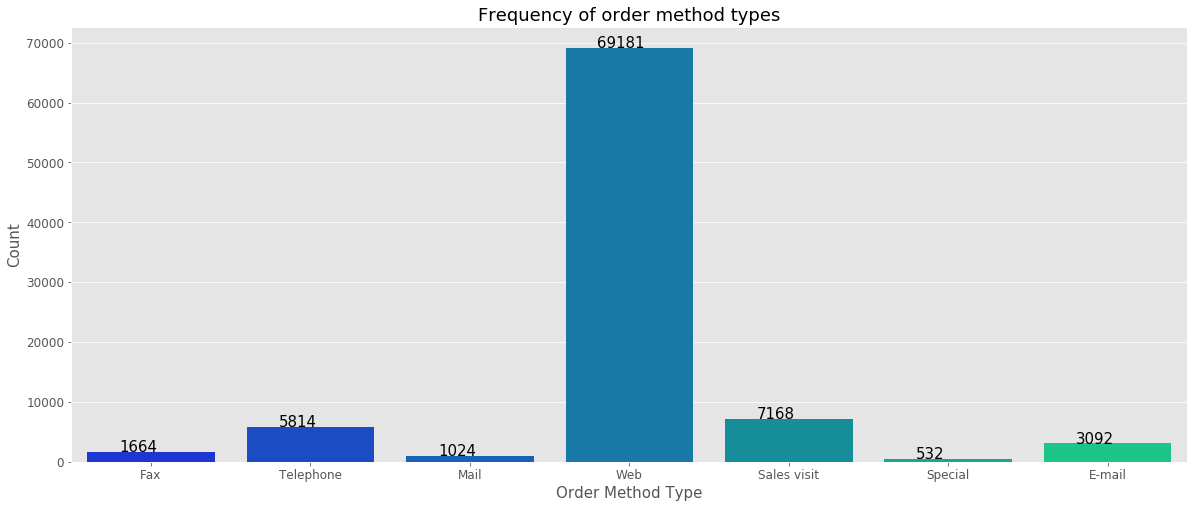

In [25]:
#Countplot of number of transactions per country
plt.figure(figsize=(20, 8))

ax=sns.countplot(x = "Order Method Type",
                 data = data,
                 palette="winter")
ax.set_title("Frequency of order method types", fontsize = 18)
plt.xlabel("Order Method Type",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                color='black',
                size=15)
    
plt.show()

<font size="4">Between 2012 and 2014, each year more and more profit is generated in almost every method of order placement except for orders placed by mail.

In [26]:
#Sums of profit as well as units sold by selected year and order method type
OMT_year_profitability=data.groupby(["Order Method Type", "Year"]).agg({"Units Sold"   : "sum",
                                                                        "Total Profit" : "sum"})
#Save of data frame to Excel
OMT_year_profitability.to_excel("Profitability of order method types in each year.xlsx")

OMT_year_profitability

Units Sold  Total Profit
Order Method Type Year                          
E-mail            2012      968453    9978124.70
                  2013      409049   25502709.12
                  2014      278762   48468680.10
Fax               2012      426006    5842199.14
                  2013      249234   15100611.81
                  2014      115988   26452387.47
Mail              2012      339635    4045947.50
                  2013      119619    5929840.62
                  2014        5066    2396745.23
Sales visit       2012     1778941   20993281.05
                  2013     1411468   73413144.32
                  2014      982938  161858377.34
Special           2012      252429    2718312.65
                  2013       13622     706771.38
                  2014       30730    2232186.94
Telephone         2012     2251898   21960184.08
                  2013      684667   38837660.94
                  2014      336381   64625288.39
Web               2012    17507323  161609766.12
                  2013    23054131  808556220.23
                  2014    17846021 2302518510.29

<font size="4">Mail, sales visit and fax generate the highest average profit in the period 2012-2014. Mail and special generate on average by far the smallest profit.

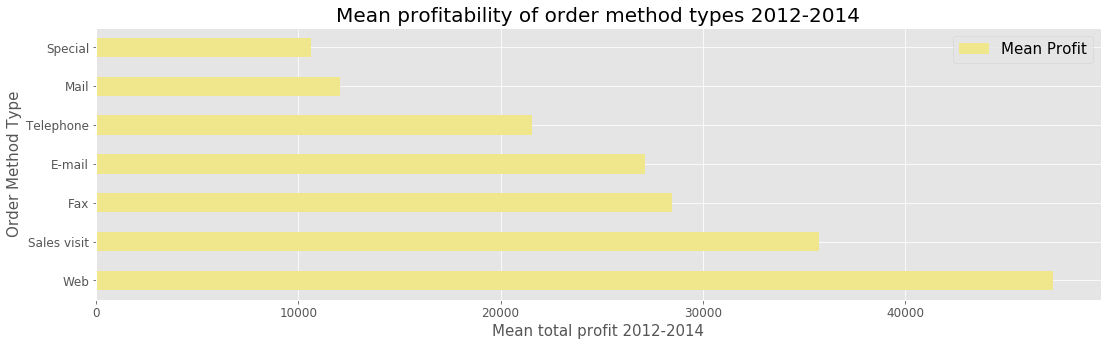

In [27]:
#Mean profit for each order method type, sorted by profit
profitability_OMT = data.groupby("Order Method Type").agg({"Total Profit":"mean"}).sort_values(by="Total Profit",
                                                                                                         ascending=False)
#Renaming of the column 
profitability_OMT.columns=["Mean Profit"]

#Bar graph of average profit per order method type
profitability_OMT.plot(kind="barh",
                       color=["khaki"],
                       figsize=(18,5))
plt.xlabel("Mean total profit 2012-2014", fontsize=15)
plt.ylabel("Order Method Type", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Mean profitability of order method types 2012-2014", fontsize=20)
plt.legend(fontsize=15)

plt.show()

# 7. Profit assesment

<font size="4">The greatest profit is generated by sales in Spain, UK, Germany, France and Italy. By far the lowest profit generates sales in denmark. Low profit is also generated by sales in Brazil and singapore.

In [28]:
#Sum of total profit per country, sorted by total profit
data.groupby(["Country"]).agg({"Total Profit" : "sum"}).sort_values(by="Total Profit",
                                                                    ascending=False)

,Total Profit
Country,
Spain,276847907.20
United Kingdom,257243559.73
Germany,252726028.55
France,242253041.96
Italy,241181039.46
United States,223559594.88
Austria,220387313.03
Japan,198509215.81
Switzerland,196487703.11


In [29]:
#Percentiles for total profit
data["Total Profit"].describe(percentiles = [0.10,0.25,0.50,0.75,0.90,1])

count     88475.00
mean      42992.34
std       65967.38
min      -18233.43
10%        3422.66
25%        8413.78
50%       21358.70
75%       50859.66
90%      103324.50
100%    1636376.45
max     1636376.45
Name: Total Profit, dtype: float64

In [30]:
#Profit evaluation based on percentiles
def profit_assesment(x):
    """
    The function that categorizes profit height.
    """
    if x["Total Profit"] <= 3422.66:
        return "Relly low"
    elif (x["Total Profit"] > 3422.66 and x["Total Profit"] <= 8413.78):
        return "Low"
    elif (x["Total Profit"] > 8413.78 and x["Total Profit"] <= 21358.70):
        return "Medium"
    elif (x["Total Profit"] > 21358.70 and x["Total Profit"] <= 50859.66):
        return "High"
    elif (x["Total Profit"] > 50859.66 and x["Total Profit"] <= 103324.50):
        return "Reall high"
    elif x["Total Profit"] > 103324.50:
        return "Extraordinary"

#Implementation of profit evaluation function in the column "Profit Assesment"
data["Profit Assesment"] = data.apply(profit_assesment, axis=1)

In [31]:
#Sample of data after modification
data.sample()

,Country,Order Method Type,Retailer Type,Product Line,Item Type,Product,Year,Quarter,Total Revenue,Units Sold,Unit Price,Gross Margin,Total Profit,Profit Assesment
73827,United Kingdom,Web,Outdoors Shop,Personal Accessories,Watches,Kodiak,2014,Q1 2014,8339.70,61,136.72,0.47,72466.50,Reall high


<font size="4">Among all the transactions carried out, 25% generated high profit and 25% generated average profit. Extraordinary profits were ensured by 10% of transactions. Only 10% of transactions provided very low profit.<br>

Year after year, more and more profit is generated. Visually, in 2014 the profit was many times higher than in 2013 and especially in 2012.

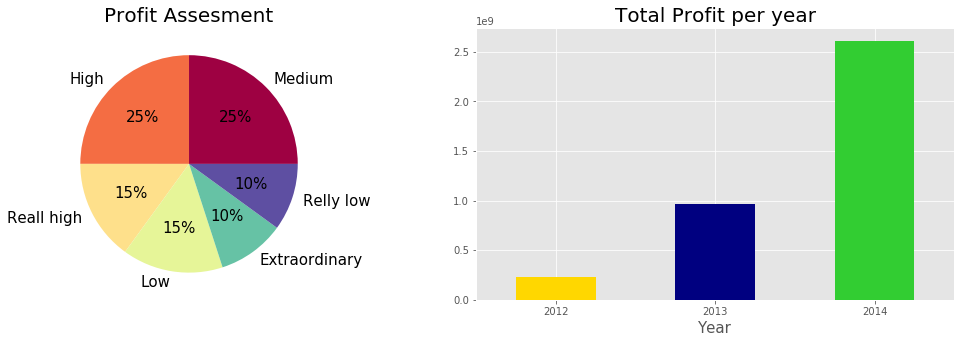

In [32]:
#Number of unique values in "Profit Assesment" column - values for revenue assesment plot
revenue_assesment_plot = data["Profit Assesment"].value_counts()
#Sum of total profit per year 
total_revenue_per_year=data.groupby("Year")["Total Profit"].sum()

#Vertical distance (0.1) between plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

#Pie plot based on number of unique values in "Profit Assesment" column 
plt.subplot(1,2,1)
revenue_assesment_plot.plot(kind="pie",
                       figsize=(10,8),
                       cmap="Spectral",
                       autopct= '%.0f%%',
                       fontsize=15)
plt.title("Profit Assesment", fontsize=20)
plt.ylabel("")

#Bar plot based on sum of total profit per year 
plt.subplot(1,2,2)
total_revenue_per_year.plot(kind="bar",
        figsize=(18,5),
        rot=0,
        color=["gold", "navy", "limegreen"])
plt.title("Total Profit per year", fontsize=20)
plt.xlabel("Year", fontsize=15)




plt.show()

# 8. Analysis of profitability of selected years (2012-2014)

<font size="4">Despite almost the same average price of the products each year, the profit is definitely rising almost from year to year. The number of products sold is also constantly growing. Thus, it should be also noted that the third quarter of 2014 is not yet over.

In [33]:
#Data about sum of total profit and units sold as well as mean unit price in each analysed year
profit_price_sold= data.groupby(["Year", "Quarter"]).agg({"Total Profit" : "sum",
                                             "Unit Price" : "mean",
                                             "Units Sold" : "sum"})
profit_price_sold

Total Profit  Unit Price  Units Sold
Year Quarter                                      
2012 Q1 2012   14329639.67      137.34     6258427
     Q2 2012   43148911.52      139.48     5579643
     Q3 2012   70628564.30      136.22     5556853
     Q4 2012   99040699.77      132.45     6129762
2013 Q1 2013  144231091.86      139.05     6094787
     Q2 2013  194480123.35      138.36     6783135
     Q3 2013  276122402.40      137.57     6467989
     Q4 2013  353213340.80      131.31     6595879
2014 Q1 2014  541297199.69      138.72     8382882
     Q2 2014  865550801.91      137.09     8344594
     Q3 2014 1201704174.17      133.34     2868410

In [34]:
#New variables corresponding to the data for each of the analysed year
year_2012=data[data["Year"]==2012]
year_2013=data[data["Year"]==2013]
year_2014=data[data["Year"]==2014]

In [35]:
print("In 2012 -> {} transactions were carried out.""\n"
     "In 2013 -> {} transactions were carried out.""\n"
     "In 2014 (up to Q3) -> {} transactions were carried out".format(year_2012.shape[0],
                                                          year_2013.shape[0],
                                                          year_2014.shape[0]))

In 2012 -> 34128 transactions were carried out.
In 2013 -> 33023 transactions were carried out.
In 2014 (up to Q3) -> 21324 transactions were carried out


<font size="4">In 2012 the largest numebr of transactions took place in USA, France, Canada.<br>
In 2013 the largest numebr of transactions took place in USA, Canada, Germany.<br>
In 2014 the largest numebr of transactions took place in USA, Japan, Canada.

In [36]:
#Data frame of number of transactions per country in 2012
number_of_transactions_per_country_2012 = pd.DataFrame({"Number of transactions" : year_2012["Country"].value_counts()})

#Sort of data frame based on number of transactions
number_of_transactions_per_country_2012= number_of_transactions_per_country_2012.sort_values(by="Number of transactions",
                                                                                        ascending=False)

#Transposition of data frame
number_of_transactions_per_country_2012= number_of_transactions_per_country_2012.T

#Save of data frame to Excel
number_of_transactions_per_country_2012.to_excel("Number of transactions per country in 2012.xlsx")

number_of_transactions_per_country_2012

,United States,France,Canada,Japan,United Kingdom,Germany,Netherlands,Switzerland,Italy,Mexico,...,China,Australia,Singapore,Belgium,Spain,Finland,Korea,Brazil,Sweden,Denmark
Number of transactions,3309,2400,2313,2043,1999,1998,1622,1545,1499,1477,...,1416,1402,1345,1339,1289,1284,1281,1218,1023,890


In [37]:
#Data frame of number of transactions per country in 2013
number_of_transactions_per_country_2013 = pd.DataFrame({"Number of transactions" : year_2013["Country"].value_counts()})

#Sort of data frame based on number of transactions
number_of_transactions_per_country_2013= number_of_transactions_per_country_2013.sort_values(by="Number of transactions",
                                                                                        ascending=False)

#Transposition of data frame
number_of_transactions_per_country_2013= number_of_transactions_per_country_2013.T

#Save of data frame to Excel
number_of_transactions_per_country_2013.to_excel("Number of transactions per country in 2013.xlsx")

number_of_transactions_per_country_2013

,United States,Canada,Germany,France,Japan,United Kingdom,Netherlands,Switzerland,Italy,Belgium,...,Austria,Spain,Australia,China,Finland,Korea,Singapore,Brazil,Sweden,Denmark
Number of transactions,2506,2245,2052,2037,1935,1845,1594,1547,1543,1481,...,1469,1378,1376,1365,1291,1291,1277,1250,1116,948


In [38]:
#Data frame of number of transactions per country in 2014
number_of_transactions_per_country_2014 = pd.DataFrame({"Number of transactions" : year_2014["Country"].value_counts()})

#Sort of data frame based on number of transactions
number_of_transactions_per_country_2014= number_of_transactions_per_country_2014.sort_values(by="Number of transactions",
                                                                                        ascending=False)

#Transposition of data frame
number_of_transactions_per_country_2014= number_of_transactions_per_country_2014.T

#Save of data frame to Excel
number_of_transactions_per_country_2014.to_excel("Number of transactions per country in 2014.xlsx")

number_of_transactions_per_country_2014

,United States,Japan,Canada,Germany,France,United Kingdom,Switzerland,Netherlands,Italy,Austria,...,Spain,Belgium,Australia,China,Finland,Korea,Singapore,Brazil,Sweden,Denmark
Number of transactions,1667,1381,1365,1347,1342,1258,1011,983,976,957,...,890,890,887,871,834,827,821,820,786,520


<font size="4">In 2012 the most significant porfit was genereted in: France, USA, UK, Germany and Italy.<br>
In 2013 the most significant porfit was genereted in: Germany, USA, France, UK and Canada.<br>
In 2014 the most significant profit was generated in: Spain, UK, Italy, Germany and France.<br>

In [39]:
#Sum of profits per country in 2012, sorted by profit descending
year_2012.groupby("Country").agg({"Total Profit" : "sum"}).sort_values(by="Total Profit", ascending=False).head()

,Total Profit
Country,
France,16953943.24
United States,16235682.22
United Kingdom,15043815.54
Germany,14703547.26
Italy,12389823.54


<font size="4">In France, where the hugest profit was generated in 2012 products: Polar Sun, Polar Ice and Legend have the most significant impact on the finance result.

In [40]:
#Units sold and profit sum per product in France in 2012
y2012_france=year_2012[(year_2012["Country"]=="France")]
y2012_france.groupby(["Country", "Product"]).agg({"Units Sold"   : "sum",
                                                  "Total Profit" :"sum"}).sort_values(by="Total Profit",
                                                                                      ascending=False).head(3)

Units Sold  Total Profit
Country Product                            
France  Polar Sun        8297     257517.74
        Polar Ice        1822     239573.27
        Legend           7216     175793.03

In [41]:
#Sum of profits per country in 2013, sorted by profit descending
year_2013.groupby("Country").agg({"Total Profit" : "sum"}).sort_values(by="Total Profit", ascending=False).head()

,Total Profit
Country,
Germany,64495576.33
United States,63988135.56
France,60091885.92
United Kingdom,58999872.68
Canada,56938525.47


<font size="4">In Germany, where the hugest profit was generated in 2013 products: Polar Sun, Polar Sports and Polar Ice have the most significant impact on the finance result.

In [42]:
#Units sold and profit sum per product in Gernamy in 2013
y2013_germany=year_2013[(year_2013["Country"]=="Germany")]
y2013_germany.groupby(["Country", "Product"]).agg({"Units Sold"   : "sum",
                                                  "Total Profit" :"sum"}).sort_values(by="Total Profit",
                                                                                      ascending=False).head(3)

Units Sold  Total Profit
Country Product                               
Germany Polar Sun           9364    1099521.70
        Polar Sports        5660     993016.68
        Polar Ice           1796     897626.11

In [43]:
#Sum of profits per country in 2014, sorted by profit descending
year_2014.groupby("Country").agg({"Total Profit" : "sum"}).sort_values(by="Total Profit", ascending=False).head()

,Total Profit
Country,
Spain,218452443.55
United Kingdom,183199871.51
Italy,176205467.28
Germany,173526904.96
France,165207212.80


<font size="4">In Spain, where the hugest profit was generated in 2014 products: Polar Sun, Zone and Cat Eye have the most significant impact on the finance result.

In [44]:
#Units sold and profit sum per product in Spain in 2014
y2014_spain=year_2014[(year_2014["Country"]=="Spain")]
y2014_spain.groupby(["Country", "Product"]).agg({"Units Sold"   : "sum",
                                                  "Total Profit" :"sum"}).sort_values(by="Total Profit",
                                                                                      ascending=False).head(3)

Units Sold  Total Profit
Country Product                            
Spain   Polar Sun        4464    4103983.81
        Zone            23067    3653790.58
        Cat Eye         27861    3609697.78

<font size ="4"> Profit results for all countries in each year.

In [45]:
#Sum of profit per country in each year
country_profit_year = data.groupby(["Country", "Year"]).agg({"Total Profit" : "sum"})

#Save of data frame to Excel
popularity_OMT_per_country.to_excel("Total profit per year in each country.xlsx")

country_profit_year.head(9)

Total Profit
Country   Year              
Australia 2012    9254090.43
          2013   39236445.39
          2014   93267757.80
Austria   2012   11903588.73
          2013   48566325.53
          2014  159917398.77
Belgium   2012   10839473.65
          2013   47919130.59
          2014  136988472.72

<font size="4">In 2012 profit from transactions was low, medium or very low.<br>
In 2013 profit from transactions was generally high, many transactions guaranteed medium profit, not a large number ensured a really high profit.<br>
In 2014 profit from ransaction was only really high and extraordinary. It means that customers are buying more and more products in one order.

In [46]:
#Number of unique values in "Profit Assesment" column in each year
y2012_plot = year_2012["Profit Assesment"].value_counts()
y2013_plot = year_2013["Profit Assesment"].value_counts()
y2014_plot = year_2014["Profit Assesment"].value_counts()

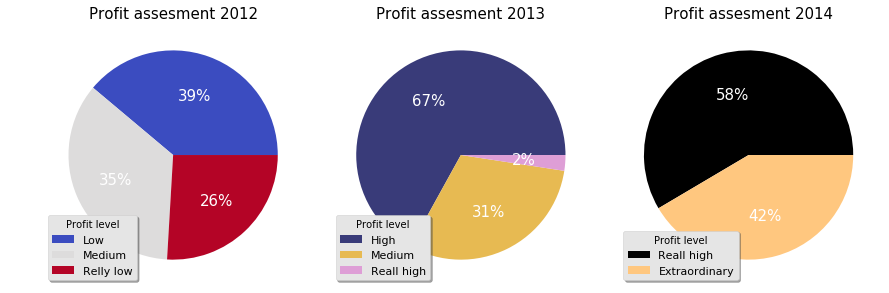

In [47]:
#Vartical distance (0.1) between plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

#Pie plot of profitt assesment column in dataset with transactions in 2012
plt.subplot(1,3,1)
y2012_plot.plot(kind="pie",
                autopct="%.0f%%",
                fontsize=15,
                textprops=dict(color="w"),
                figsize=(15,15),
                cmap="coolwarm")

plt.legend(loc=3, prop={'size': 11}, fancybox=True, shadow=True, title="Profit level")
plt.ylabel("")
plt.title("Profit assesment 2012", fontsize=15)

#Pie plot of profitt assesment column in dataset with transactions in 2013
plt.subplot(1,3,2)
y2013_plot.plot(kind="pie",
                autopct="%.0f%%",
                fontsize=15,
                textprops=dict(color="w"),
                figsize=(15,15),
                cmap="tab20b")

plt.legend(loc=3, prop={'size': 11}, fancybox=True, shadow=True, title="Profit level")
plt.ylabel("")
plt.title("Profit assesment 2013", fontsize=15)

#Pie plot of profitt assesment column in dataset with transactions in 2014
plt.subplot(1,3,3)
y2014_plot.plot(kind="pie",
                autopct="%.0f%%",
                fontsize=15,
                textprops=dict(color="w"),
                figsize=(15,15),
                cmap="copper")

plt.legend(loc=3, prop={'size': 11}, fancybox=True, shadow=True, title="Profit level")
plt.ylabel("")
plt.title("Profit assesment 2014", fontsize=15)


plt.show()

<font size="4">Year after year there is an increase in profit from transactions in each country.<br>
The largest increase in profit occurred between 2012 and 2013, however, between 2013 and 2014 there was also a significant increase in profit.<br>

In [48]:
#Changes in profit sums in particular years
profit_changes_years = data.pivot_table(index="Country",
                                        columns="Year",
                                        values="Total Profit",
                                        aggfunc=sum)
profit_changes_years.insert(loc=3,
                            column="2012 to 2013",
                            value= (profit_changes_years[2013] - profit_changes_years[2012]))
profit_changes_years.insert(loc=4,
                            column="2013 to 2014",
                            value= (profit_changes_years[2014] - profit_changes_years[2013]))
profit_changes_years.insert(loc=5,
                            column="2012 to 2013 in %",
                            value= 100 - (profit_changes_years[2012]*100 / profit_changes_years[2013]))
profit_changes_years.insert(loc=6,
                            column="2013 to 2014 in %",
                            value= 100 - (profit_changes_years[2013]*100 / profit_changes_years[2014]))

#Save of data frame to Excel
profit_changes_years.to_excel("Comparison of total profit per year in each country.xlsx")

profit_changes_years

Year,2012,2013,2014,2012 to 2013,2013 to 2014,2012 to 2013 in %,2013 to 2014 in %
Country,,,,,,,
Australia,9254090.43,39236445.39,93267757.80,29982354.96,54031312.41,76.41,57.93
Austria,11903588.73,48566325.53,159917398.77,36662736.80,111351073.25,75.49,69.63
Belgium,10839473.65,47919130.59,136988472.72,37079656.94,89069342.12,77.38,65.02
Brazil,6910933.50,33302041.47,76324447.69,26391107.98,43022406.22,79.25,56.37
Canada,12368582.93,56938525.47,122400848.98,44569942.54,65462323.52,78.28,53.48
China,9012612.30,38304338.80,93473494.42,29291726.50,55169155.61,76.47,59.02
Denmark,6185294.81,27506987.23,56543760.30,21321692.42,29036773.08,77.51,51.35
Finland,9212935.66,38954099.49,98356466.98,29741163.84,59402367.49,76.35,60.39
France,16953943.24,60091885.92,165207212.80,43137942.69,105115326.87,71.79,63.63


<font size="4">Dataset contains only data up to Q3 2014.<br>
In 2014 from quarter to quarter there is increase in Total Profit in each country. Definitely, the most significant increase is in Austria, Italy and Spain. The least sgnificant increase of profit is in Denmark and Mexico, less increase is also in Brazil and Canada.

In [49]:
#Changes in profit sums in particular countries with division of the quarters (up to Q3) in 2014
profit_quarters_2014= year_2014.pivot_table(index="Country",
                                            columns=["Quarter"],
                                            values="Total Profit",
                                            aggfunc="sum")
profit_quarters_2014.insert(loc=3,
                            column="Q1 to Q2",
                            value= (profit_quarters_2014["Q2 2014"] - profit_quarters_2014["Q1 2014"]))
profit_quarters_2014.insert(loc=4,
                            column="Q2 to Q3",
                            value= (profit_quarters_2014["Q3 2014"] - profit_quarters_2014["Q2 2014"]))
profit_quarters_2014.insert(loc=5,
                            column="Q1 to Q2 in %",
                          value= 100 - (profit_quarters_2014["Q1 2014"]*100 / profit_quarters_2014["Q2 2014"]))
profit_quarters_2014.insert(loc=6,
                            column="Q2 to Q3 in %",
                          value= 100 - (profit_quarters_2014["Q2 2014"]*100 / profit_quarters_2014["Q3 2014"]))

#Save of data frame to Excel
profit_quarters_2014.to_excel("Comparison of total profit per quarter in 2014 in each country.xlsx")

profit_quarters_2014

Quarter,Q1 2014,Q2 2014,Q3 2014,Q1 to Q2,Q2 to Q3,Q1 to Q2 in %,Q2 to Q3 in %
Country,,,,,,,
Australia,22526486.81,32477300.27,38263970.72,9950813.45,5786670.45,30.64,15.12
Austria,28903983.01,48177826.04,82835589.71,19273843.03,34657763.67,40.01,41.84
Belgium,24813086.20,46844781.86,65330604.66,22031695.66,18485822.80,47.03,28.30
Brazil,18282163.43,27805744.79,30236539.46,9523581.36,2430794.67,34.25,8.04
Canada,28262358.71,45035091.60,49103398.67,16772732.88,4068307.07,37.24,8.29
China,19848727.30,31088381.12,42536385.99,11239653.81,11448004.87,36.15,26.91
Denmark,14685104.89,20754612.67,21104042.74,6069507.78,349430.07,29.24,1.66
Finland,21309477.72,34249534.71,42797454.54,12940056.99,8547919.83,37.78,19.97
France,34137722.07,58187720.71,72881770.03,24049998.64,14694049.32,41.33,20.16


In [50]:
#Changes in profit sums in particular countries with division of the quarters in 2012-2014
profit_quarters__whole_years=data.pivot_table(index="Country",
                                              columns=["Year","Quarter"],
                                              values="Total Profit",
                                              aggfunc="sum")

#Save of data frame to Excel
profit_quarters__whole_years.to_excel("Total profit per quarter in each year in each country.xlsx")

profit_quarters__whole_years

Year                 2012                                         2013  \
Quarter           Q1 2012    Q2 2012    Q3 2012    Q4 2012     Q1 2013   
Country                                                                  
Australia       526198.37 1660938.33 2855861.75 4211091.97  5614898.58   
Austria        1043551.63 2202690.43 3524351.35 5132995.32  7148045.09   
Belgium         917834.19 2050757.52 3344609.20 4526272.74  7255049.89   
Brazil          222990.04 1243445.75 2156093.41 3288404.30  4895478.58   
Canada          219522.83 2109679.46 3997159.07 6042221.57  8710260.50   
China           473341.97 1746473.85 2910789.79 3882006.70  5769182.39   
Denmark         415314.20 1146641.10 1847678.14 2775661.36  4614289.57   
Finland         583955.30 1705904.67 2847276.47 4075799.21  5470596.45   
France         1303121.41 3456408.55 5248660.84 6945752.44 10632881.81   
Germany        1215575.11 2923702.66 4185979.69 6378289.80  8493423.74   
Italy          1190261.64 2472984.79 3685287.08 5041290.03  7661699.44   
Japan           552168.67 2134932.22 3620696.67 4909561.64  8458889.60   
Korea           424697.17 1483720.29 2588301.10 3269048.61  5098798.20   
Mexico          206063.97 1457829.59 2765813.90 3796033.64  5619571.93   
Netherlands     651779.54 2087946.56 3262252.61 4939580.18  7143746.24   
Singapore       368521.17 1496882.21 2604259.32 3769827.08  4970548.30   
Spain          1009089.86 2090409.22 3205633.77 4833789.59  6889763.60   
Sweden          442609.14 1287351.31 2233215.54 3088415.70  4414488.93   
Switzerland     965449.64 2345390.93 3970298.32 4271922.30  7288215.83   
United Kingdom 1568816.58 2986044.23 4215511.51 6273443.22  9279542.72   
United States    28777.22 3058777.88 5558834.77 7589292.35  8801720.48   

Year                                                      2014              \
Quarter            Q2 2013     Q3 2013     Q4 2013     Q1 2014     Q2 2014   
Country                                                                      
Australia       7900469.19 11906994.96 13814082.66 22526486.81 32477300.27   
Austria         9986579.79 14165586.44 17266114.21 28903983.01 48177826.04   
Belgium        10003412.90 14135738.44 16524929.36 24813086.20 46844781.86   
Brazil          6568867.58  9529131.91 12308563.41 18282163.43 27805744.79   
Canada         12317996.02 16285580.20 19624688.74 28262358.71 45035091.60   
China           7747190.26 10641779.53 14146186.62 19848727.30 31088381.12   
Denmark         5563505.18  7690570.99  9638621.48 14685104.89 20754612.67   
Finland         7812763.66 11177342.84 14493396.54 21309477.72 34249534.71   
France         12909037.37 15363977.59 21185989.16 34137722.07 58187720.71   
Germany        13658215.89 18211392.80 24132543.90 37199527.78 57669542.17   
Italy           9619797.03 15242963.84 20061288.33 30455365.07 53236383.85   
Japan          10093616.43 14359564.77 18642006.42 29919429.57 47511430.82   
Korea           7203693.67 10554355.14 13161649.39 19898741.53 29131054.88   
Mexico          7492358.50 10966499.25 15082787.17 19913822.73 29950114.54   
Netherlands     9123277.55 12791608.39 16750888.42 24440623.76 37205844.29   
Singapore       6942910.35 10354530.92 13002677.20 19421234.17 28940572.54   
Spain           9595336.46 12958432.03 17813009.11 27339424.04 50299509.02   
Sweden          6704966.51  9406286.07 12724907.05 20387624.81 31067781.28   
Switzerland     9606598.69 14513695.66 17428167.52 29247517.11 44540591.21   
United Kingdom 11442213.54 16953755.51 21324360.91 35144569.84 60331334.80   
United States  12187316.76 18912615.11 24086483.21 35160209.13 51045648.73   

Year                         
Quarter             Q3 2014  
Country                      
Australia       38263970.72  
Austria         82835589.71  
Belgium         65330604.66  
Brazil          30236539.46  
Canada          49103398.67  
China           42536385.99  
Denmark         21104042.74  
Finland         42797454.54  
France          7288

# 9. Analysis of profitability of products including units sold and unit price

<font size="4">Despite a very similar average price level in each quarter of each year, the number of products sold is growing almost every quarter. It should be mentioned that the 3rd quarter of 2014 in the examined data collection has not yet ended. 

In [51]:
#Mean and max unit price per quarter and sum of units sold per quarter
mean_price_quarter = data.groupby(["Year", "Quarter"]).agg({"Unit Price" : ["mean", "max"],
                                                            "Units Sold" : "sum"}).round(2)
#Save of data frame to Excel
mean_price_quarter.to_excel("Unit price and units sold per quarter in each year.xlsx")

mean_price_quarter

Unit Price         Units Sold
                   mean     max        sum
Year Quarter                              
2012 Q1 2012     137.34 1296.05    6258427
     Q2 2012     139.48 1305.33    5579643
     Q3 2012     136.22 1300.32    5556853
     Q4 2012     132.45 1305.33    6129762
2013 Q1 2013     139.05 1305.33    6094787
     Q2 2013     138.36 1292.50    6783135
     Q3 2013     137.57 1305.33    6467989
     Q4 2013     131.31 1305.33    6595879
2014 Q1 2014     138.72 1291.73    8382882
     Q2 2014     137.09 1291.73    8344594
     Q3 2014     133.34 1291.73    2868410

<font size="4">Significant part of products cost up to 100 monetary units. In general, there are very few products more expensive than 200 money units in the dataset.

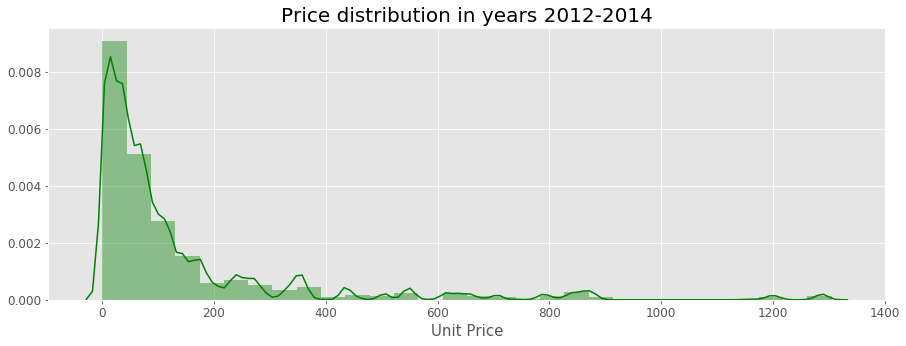

In [56]:
#Price distribution
plt.figure(figsize=(15, 5))
sns.distplot(data["Unit Price"], bins=30, color="green", kde=True)
plt.title("Price distribution in years 2012-2014", fontsize=20)
plt.xlabel("Unit Price", fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<font size="4">Year after year in almost every country mean price is falling or rising minimally. It is really good news, given that, as has been observed before, the profits in each country are increasing year after year.<br>
The biggest price changes were observed in Denmark. 

In [57]:
#Changes in mean units price in particular countries
country_unit_price = data.pivot_table(index="Country",
                                      columns=["Year"],
                                      values="Unit Price",
                                      aggfunc="mean")
country_unit_price.insert(loc=3,
                          column="2012 to 2013",
                          value= (country_unit_price[2013] - country_unit_price[2012]))
country_unit_price.insert(loc=4,
                          column="2013 to 2014",
                          value= (country_unit_price[2014] - country_unit_price[2013]))
country_unit_price.insert(loc=5,
                          column="2012 to 2013 in %",
                          value= 100 - (country_unit_price[2012]*100 / country_unit_price[2013]))
country_unit_price.insert(loc=6,
                          column="2013 to 2014 in %",
                          value= 100 - (country_unit_price[2013]*100 / country_unit_price[2014]))

#Save of data frame to Excel
country_unit_price.to_excel("Comparison of unit price per year in each country.xlsx")

country_unit_price

Year,2012,2013,2014,2012 to 2013,2013 to 2014,2012 to 2013 in %,2013 to 2014 in %
Country,,,,,,,
Australia,135.81,136.11,131.86,0.30,-4.25,0.22,-3.22
Austria,132.96,136.50,136.69,3.55,0.19,2.60,0.14
Belgium,129.76,136.11,128.42,6.35,-7.70,4.67,-5.99
Brazil,138.12,139.15,138.12,1.02,-1.03,0.74,-0.75
Canada,142.75,138.87,135.62,-3.88,-3.25,-2.79,-2.40
China,137.17,132.97,123.35,-4.20,-9.62,-3.16,-7.80
Denmark,108.12,117.40,105.94,9.28,-11.46,7.91,-10.81
Finland,122.19,121.70,124.28,-0.49,2.58,-0.40,2.08
France,141.84,141.40,145.40,-0.44,4.00,-0.31,2.75


In [58]:
#Quantity of specific products sold in each country
most_popular_products_country = data.groupby(["Country", "Product"]).agg({"Units Sold":"sum"})

#Save of data frame to Excel
most_popular_products_country.to_excel("Quantity of specific products sold in each country.xlsx")

most_popular_products_country

Units Sold
Country       Product                        
Australia     Aloe Relief                2344
              Astro Pilot                3132
              Auto Pilot                  581
              Bear Edge                  7789
              Bear Survival Edge         2854
...                                       ...
United States TrailChef Water Bag      505671
              Trendi                   128523
              Venue                    128475
              Zodiak                    33915
              Zone                     782730

[3023 rows x 1 columns]

<font size="4">Despite growing profits from year to year, while in 2013, compared to 2012, there was an increase in the number of products sold in every country except France, in 2014, compared to 2013, there was a decrease in sales in every country. This is of course due to the fact that in the examined data set the data ends in Q3 2014.<br>

In [59]:
#Changes in units sold in particular countries
country_unit_price = data.pivot_table(index="Country",
                                      columns=["Year"],
                                      values="Units Sold",
                                      aggfunc="sum")
country_unit_price.insert(loc=3,
                          column="2012 to 2013",
                          value= (country_unit_price[2013] - country_unit_price[2012]))
country_unit_price.insert(loc=4,
                          column="2013 to 2014",
                          value= (country_unit_price[2014] - country_unit_price[2013]))
country_unit_price.insert(loc=5,
                          column="2012 to 2013 in %",
                          value= 100 - (country_unit_price[2012]*100 / country_unit_price[2013]))
country_unit_price.insert(loc=6,
                          column="2013 to 2014 in %",
                          value= 100 - (country_unit_price[2013]*100 / country_unit_price[2014]))

#Save of data frame to Excel
country_unit_price.to_excel("Comparison of units sold per year in each country.xlsx")

country_unit_price

Year,2012,2013,2014,2012 to 2013,2013 to 2014,2012 to 2013 in %,2013 to 2014 in %
Country,,,,,,,
Australia,522186,839750,638845,317564,-200905,37.82,-31.45
Austria,702134,803771,596301,101637,-207470,12.65,-34.79
Belgium,635694,662157,501170,26463,-160987,4.00,-32.12
Brazil,688643,732746,536063,44103,-196683,6.02,-36.69
Canada,1499661,1664287,1255196,164626,-409091,9.89,-32.59
China,1610801,1731848,1254337,121047,-477511,6.99,-38.07
Denmark,351188,377738,233173,26550,-144565,7.03,-62.00
Finland,972235,1031016,783549,58781,-247467,5.70,-31.58
France,1477876,1428245,1138257,-49631,-289988,-3.47,-25.48


<font size="4">Most popular products in 2012: Zone, TrailChef Water Bag, Granite Carabiner, BugShield Extreme, Single Edge. <br>
Most popular products in 2013: Zone, TrailChef Water Bag, Single Edge, Granite Carabiner, Fairway.<br>
Most popular products in 2014: Granite Carabiner, TrailChef Water Bag, Single Edge, Cat Eye, Zone.

In [60]:
#The largest number of products sold in 2012
y_2012_top_products=year_2012.groupby("Product").agg({"Units Sold" : "sum"}).sort_values(by="Units Sold",
                                                                                         ascending=False).head(5)
y_2012_top_products

,Units Sold
Product,
Zone,1523988
TrailChef Water Bag,1124877
Granite Carabiner,833945
BugShield Extreme,831667
Single Edge,789046


In [61]:
#The largest number of products sold in 2013
y_2013_top_products=year_2013.groupby("Product").agg({"Units Sold" : "sum"}).sort_values(by="Units Sold",
                                                                                         ascending=False).head(5)
y_2013_top_products

,Units Sold
Product,
Zone,1543262
TrailChef Water Bag,1260914
Single Edge,1128885
Granite Carabiner,1110418
Fairway,1004133


In [62]:
#The largest number of products sold in 2014
y_2014_top_products=year_2014.groupby("Product").agg({"Units Sold" : "sum"}).sort_values(by="Units Sold",
                                                                                         ascending=False).head(5)
y_2014_top_products

,Units Sold
Product,
Granite Carabiner,1201831
TrailChef Water Bag,947501
Single Edge,870307
Cat Eye,815887
Zone,815817


<font size="4">Most of the most expensive products (price above 351.62 money units, 10% of the most expensive products) were sold in: USA, France, Canada, Japan, Germany.<br>
Most of the least expensive products (price below 6.65 money units, 10% of the least expensive products) were sold in: USA, Japan, France, Germany, Canada.<br>

In [63]:
#Percentiles of unit price
data["Unit Price"].describe(percentiles = [0.10, 0.90])

count   88475.00
mean      136.63
std       208.18
min         0.00
10%         6.65
50%        63.43
90%       351.62
max      1305.33
Name: Unit Price, dtype: float64

In [64]:
#Countries with the highest volume of sales of the most expensive products
sold_most_expensive_products=data[(data["Unit Price"] >= 351.62)]
sold_most_expensive_products = sold_most_expensive_products["Country"].value_counts().to_frame().head(5)
sold_most_expensive_products

,Country
United States,790
France,631
Canada,609
Japan,577
Germany,565


In [65]:
#Countries with the highest volume of sales of the least expensive products
sold_least_expensive_products=data[(data["Unit Price"] <= 6.65)]
sold_least_expensive_products = sold_least_expensive_products["Country"].value_counts().to_frame().head(5)
sold_least_expensive_products

,Country
United States,796
Japan,592
France,587
Germany,564
Canada,553


# 10. Conclusions

### Briefly<br>
* Between 2012 and Q3 2014, 88475 transactions were carried out:<br>
 - 34128 in 2012, 
 - 33023 in 2013 
 - 21324 in 2014 (up to Q3)
* There are:<br>
 - 21 countries,
 - 7 order method types,
 - 8 retailer types,
 - 5 product lines,
 - 21 item types,
 - 144 different products
* Year by year there is increase of profits in each country.
* Year by year there in almost every country mean price is falling or rising minimally.
* In 2013, compared to 2013, in each contry there was an increase in sales of products, except France, where was a minimal drop in sales. No complete data for 2014 (only up to Q3).
* Most of the most expensive products (price above 351.62 money units, 10% of the most expensive products) were sold in: USA, France, Canada, Japan, Germany.
* Most of the least expensive products (price below 6.65 money units, 10% of the least expensive products) were sold in: USA, Japan, France, Germany, Canada.
* By far the most products were sold through the website. The website also generates the biggest profit, the biggest profit per order. However, the website does not generate the greatest profit per unit sold. It means that the most expensive products are not sold with this method of making an order.
* The hugest profit per unit sold generate sales visit, and fax, so the most expensive products are sold by these order method types. Low indicator of profit per unit sold have: Mail and Special.


### General summary<br>
* By far the most transactions took place in the USA and then in Canada France and Germany. The least transactions took place in Denmark, Sweden and Brazil.
* In the USA, Japan and UK, there are the most number of available methods of order products (7) and the least in Brazil and Finland (2).
* In each country, the website is the most popular method of placing an order. Sales visit and telephone are also popular methods of ordering.
* Interestingly, in Brazil, orders are placed only via web and e-mail. In Finland only by visit sales as well as web.
* Email is really popular in: Canada, Germany, Italy, Japan and Swede
* Fax is really popular in Belgium, France, Singapore, Spain, Switzerlands and USA8 
* Mail is really popular in Canada, Germany, Japan, Netherlands and USA
* Sales visit is really popular in each country except Brazil, Singapore and Spain
* Special orders are popular mainly in Singapore and Switzerland
* Telephon is really popular in each country except Belgium, Brazil Denmark, Finland, Mexico and Switzerland
* Web is the most popular ordering method in each country
* By far the most products were sold through the website. The website also generates the biggest profit, the biggest profit per order. However, the website does not generate the greatest profit per unit sold. It means that the most expensive products are not sold with this method of making an order.
* The hugest profit per unit sold generate sales visit, and fax, so the most expensive products are sold by these order method types. Low indicator of profit per unit sold have: Mail and Special.
* By far the most orders are placed through the website. Clients often choose also telephon as an order method type and sales visit.
* Between 2012 and 2014, each year more and more profit is generated in almost every method of order placement except for orders placed by mail.
* Mail, sales visit and fax generate the highest average profit in the period 2012-2014. Mail and special generate on average by far the smallest profit.
* The greatest profit is generated by sales in Spain, UK, Germany, France and Italy. By far the lowest profit generates sales in Denmark. Low profit is also generated by sales in Brazil and Singapore.
* Among all the transactions carried out, 25% generated high profit and 25% generated average profit. Extraordinary profits were ensured by 10% of transactions. Only 10% of transactions provided very low profit.
* Year after year, more and more profit is generated. Visually, in 2014 the profit was many times higher than in 2013 and especially in 2012.
* Despite almost the same average price of the products each year, the profit is definitely rising almost from year to year. The number of products sold is also constantly growing. Thus, it should be also noted that the third quarter of 2014 is not yet over.
* In 2012 the most significant porfit was genereted in: France, USA, UK, Germany and Italy.
* In France, where the hugest profit was generated in 2012 products: Polar Sun, Polar Ice and Legend have the most significant impact on the finance result.
* In 2013 the most significant porfit was genereted in: Germany, USA, France, UK and Canada.
* In Germany, where the hugest profit was generated in 2013 products: Polar Sun, Polar Sports and Polar Ice have the most significant impact on the finance result.
* In 2014 the most significant profit was generated in: Spain, UK, Italy, Germany and France.
* In Spain, where the hugest profit was generated in 2014 products: Polar Sun, Zone and Cat Eye have the most significant impact on the finance result.
* Year on year in each country from the top five, profits increased significantly.
* In 2012 profit from transactions was low, medium or very low.
* In 2013 profit from transactions was generally high, many transactions guaranteed medium profit, not a large number ensured a really high profit.
* In 2014 profit from ransaction was only really high and extraordinary. It means that customers are buying more and more products in one order.
* The largest increase in profit occurred between 2012 and 2013, however, between 2013 and 2014 there was also a significant increase in profit.
* Despite a very similar average price level in each quarter of each year, the number of products sold is growing almost every quarter. It should be mentioned that the 3rd quarter of 2014 in the examined data collection has not yet ended.
* Significant part of products cost up to 100 monetary units. In general, there are very few products more expensive than 200 money units in the dataset.
* Year after year in almost every country mean price is falling or rising minimally. It is really good news, given that, as has been observed before, the profits in each country are increasing year after year.
* The biggest price changes were observed in Denmark.
* Despite growing profits from year to year, while in 2013, compared to 2012, there was an increase in the number of products sold in every country except France, in 2014, compared to 2013, there was a decrease in sales in every country. This is of course due to the fact that in the examined data set the data ends in Q3 2014.
* In 2014 from quarter to quarter there is increase in Total Profit in each country. Definitely, the most significant increase is in Austria, Italy and Spain. The least sgnificant increase of profit is in Denmark and Mexico, less increase is also in Brazil and Canada.
* Most popular products in 2012: Zone, TrailChef Water Bag, Granite Carabiner, BugShield Extreme, Single Edge.
* Most popular products in 2013: Zone, TrailChef Water Bag, Single Edge, Granite Carabiner, Fairway.
* Most popular products in 2014: Granite Carabiner, TrailChef Water Bag, Single Edge, Cat Eye, Zone.
* Most of the most expensive products (price above 351.62 money units, 10% of the most expensive products) were sold in: USA, France, Canada, Japan, Germany.
* Most of the least expensive products (price below 6.65 money units, 10% of the least expensive products) were sold in: USA, Japan, France, Germany, Canada.
* In 2012 the largest numebr of transactions took place in USA, France, Canada.
* In 2013 the largest numebr of transactions took place in USA, Canada, Germany.
* In 2014 the largest numebr of transactions took place in USA, Japan, Canada.